# File handling tools

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [104]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.fileHandling as fh
import py.logs as logs
import py.vidRead as vr
import py.vidDroplet as vd
import py.vidMorph as vm
from py.imshow import imshow
import matplotlib.pyplot as plt
LOGGERDEFINED = logs.openLog('fileHandling.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=True)

## Go through all videos and analyze

In [290]:
fh.analyzeRecursive(cfg.path.vids)

Droplet: {'name': 'M0S', 'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 0.0, 'tau0': 100000.0, 'k': 0.0, 'n': 0.0, 'eta0': 0.025842070967741937}
Matrix: {'name': '2.75T', 'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 2.75, 'tau0': 0.183228, 'k': 4.295523102, 'n': 0.153900242, 'eta0': 3.22334}
Profile:
     mode  gap strain rate freq direction time
0   stdy  500    n/a   20  n/a        cw    1
1   stdy  500    n/a   20  n/a       acw    1
2  relax  500    n/a    0  n/a       n/a  100
Videos: ['Basler acA2040-90uc (21726010)_20210804_094911266.mp4', 'Basler acA2040-90uc (21726010)_20210804_095140161.mp4', 'Basler acA2040-90uc (21726010)_20210804_095340615.mp4', 'Basler acA2040-90uc (21726010)_20210804_095440924.mp4', 'Basler acA2040-90uc (21726010)_20210804_095550979.mp4', 'Basler acA2040-90uc (21726010)_20210804_095638101.mp4', 'Basler acA2040-90uc (21726010)_20210804_095740545.mp4', 'Basler acA2040-90uc (21726

## Test mode: Analyze one folder

In [3]:
# create object to hold all metadata about folder
t = fh.Test(os.path.join(cfg.path.vids, 'steady', '210616 mineralS LapRDT','M4S_2.75T_p4'))

In [6]:
# go through all videos in folder and extract data
t.analyze()

In [23]:
# print metadata about the folder
t.prnt()

INFO: Droplet: {'name': 'M4S', 'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 4.0, 'tau0': 0.18871, 'k': 0.640731304, 'n': 0.511230738, 'eta0': 2.35373}
INFO: Matrix: {'name': '2.75T', 'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 2.75, 'tau0': 0.183228, 'k': 4.295523102, 'n': 0.153900242, 'eta0': 3.22334}
INFO: Profile:
    mode  gap strain rate freq direction time
0   stdy  500    n/a    1  n/a        cw    8
1   stdy  500    n/a    2  n/a       acw    6
2   stdy  500    n/a    3  n/a        cw    4
3   stdy  500    n/a    4  n/a       acw    3
4   stdy  500    n/a    5  n/a        cw    2
5   stdy  500    n/a    6  n/a       acw    2
6   stdy  500    n/a    8  n/a        cw    2
7   stdy  500    n/a   10  n/a       acw    2
8   stdy  500    n/a   12  n/a        cw    2
9   stdy  500    n/a   16  n/a       acw    1
10  stdy  500    n/a   20  n/a        cw    1
11  stdy  500    n/a   30  n/a       acw    1
12

### Test mode: analyze one video

In [7]:
# create object to hold metadata about video
vidnum = 0 # index in t.videos
vi0 = vr.vidInfo(t,vidnum)

In [ ]:
# load all tables from file
vi0.loadAll()

In [107]:
# analyze video
vi0.analyze()

,x (px),y (px),w (px),h (px),angle
0,652,751,151,172,174
1,594,376,206,286,169


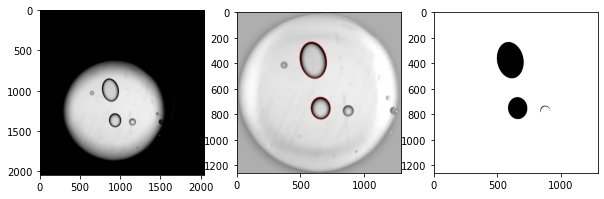

In [103]:
# look at thresholding and droplet detection for just one frame
vi0.detectDropletOneFrame(frameNum=810, diag=True)

In [39]:
# just analyze a specific range of frames
vi0.dTabs.readFrames(startFrame=982, endFrame=985, diag=3)

INFO: Analyzing frame 982/985, [1129]
984.0 0


,dropNum,newindex,oldindex,dd,dpos,dx,dframe,v,dvol,dposnorm,fit
1,1.0,0,1,-50.942046,-1.455487,1.313477,35.0,-72.774351,0.010438,-inf,1.0


985.0 0


,dropNum,newindex,oldindex,dd,dpos,dx,dframe,v,dvol,dposnorm,fit
1,1.0,0,1,-130.869326,-130.869326,-5.779663,1.0,-6543.466295,0.00176,-inf,1.0


985.0 reset 1 -6543.466294770193 4411.3785154440775 10954.84481021427


,frame,time,dropNum,x,y,dpos,v,w,l,angle,vest
1196,984.0,19.68,1.0,634.224792,940.277039,0.000000,0.000000,187.443192,358.484863,179.149353,5.275927e+07
1197,985.0,19.70,1.0,628.445129,809.535400,-130.869326,-6543.466295,187.514038,357.583710,176.956680,5.266643e+07


,frame,time,dropNum,x,y,dpos,v,w,l,angle,vest
321,200.0,4.00,1.0,671.412964,993.998901,5.569378,278.468916,216.456314,229.929489,1.688855,4.512568e+07
322,201.0,4.02,1.0,671.387695,997.863770,3.864951,193.247538,216.601898,229.639175,1.641483,4.512935e+07
323,202.0,4.04,1.0,671.428406,1001.786194,3.922636,196.131779,216.632767,229.594711,1.794262,4.513348e+07
324,203.0,4.06,1.0,671.566895,1006.713806,4.929558,246.477900,216.551727,229.684372,2.073922,4.511733e+07
325,204.0,4.08,1.0,671.607239,1010.002686,3.289127,164.456342,216.659439,229.334412,2.294279,4.509341e+07
...,...,...,...,...,...,...,...,...,...,...,...
769,596.0,11.92,0.0,631.039429,444.149261,-16.484555,-824.227751,153.616333,163.818604,168.803207,1.619297e+07
770,597.0,11.94,0.0,628.782104,429.336731,-14.983543,-749.177170,153.706940,163.591705,168.357361,1.618963e+07
771,598.0,11.96,0.0,626.025269,412.812988,-16.752141,-837.607033,153.691223,163.849869,168.347504,1.621186e+07
772,599.0,11.98,0.0,623.146301,396.449097,-16.615216,-830.760797,153.687820,163.906921,167.739014,1.621679e+07


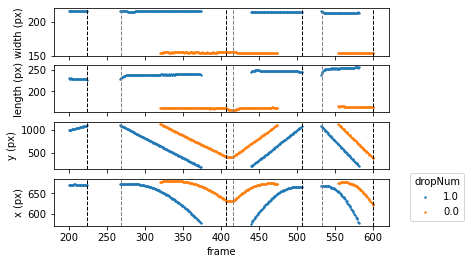

In [108]:
# get table and plot for a span of time
vi0.inspectRange('frame', xmin=200, xmax=600, relabeled=True)

,dropNum,N,gdotrad,gdotHz,etad,etam,lam,k,w,l,...,gdotHzerr,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk
0,1,141,6.283185,1.0,0.829441,4.478751,0.185195,0.870977,0.000485,0.000514,...,0.033590,0.000248,0.001074,0.028459,0.000240,0.006173,0.933949,-3.619557e+05,4.328312,644.650417
1,1,83,12.566371,2.0,0.550961,2.481156,0.222058,0.898782,0.000484,0.000535,...,0.034330,0.000248,0.001189,0.050194,0.000479,0.019564,3.730076,-4.117027e+05,4.791957,676.806582
2,1,54,18.849556,3.0,0.437422,1.756678,0.249005,0.918131,0.000480,0.000554,...,0.027047,0.000248,0.001273,0.072145,0.000724,0.039589,8.519729,-5.407321e+05,5.127492,767.430083
3,1,39,25.132741,4.0,0.372570,1.375077,0.270945,0.933312,0.000478,0.000567,...,0.023334,0.000248,0.001333,0.085448,0.000970,0.059752,15.262035,-5.998444e+05,5.371966,801.688965
4,1,29,31.415927,5.0,0.329512,1.137216,0.289753,0.945939,0.000474,0.000584,...,0.020339,0.000248,0.001383,0.103590,0.001216,0.087409,23.993415,-7.254429e+05,5.570432,875.729851
5,1,29,37.699112,6.0,0.298346,0.973779,0.306380,0.956814,0.000475,0.000579,...,0.133326,0.000248,0.001257,0.097811,0.001291,0.096213,27.040437,-6.851636e+05,5.063689,846.220266
6,1,18,50.265482,8.0,0.255474,0.762359,0.335110,0.975002,0.000466,0.000622,...,0.014494,0.000248,0.001492,0.142840,0.001957,0.178945,62.158263,-9.890596e+05,6.010475,1007.183390
7,1,13,62.831853,10.0,0.226796,0.630555,0.359677,0.989975,0.000463,0.000642,...,0.020065,0.000248,0.001534,0.162197,0.002432,0.245074,96.027346,-1.106834e+06,6.179034,1057.375274
8,1,11,75.398224,12.0,0.205924,0.539981,0.381353,1.002767,0.000456,0.000663,...,0.008919,0.000248,0.001594,0.185075,0.002952,0.325875,141.442713,-1.312937e+06,6.421978,1144.252591
9,1,8,100.530965,16.0,0.177043,0.422801,0.418740,1.023955,0.000448,0.000699,...,0.017249,0.000248,0.001650,0.218277,0.003903,0.489192,247.244719,-1.572517e+06,6.648126,1239.244807


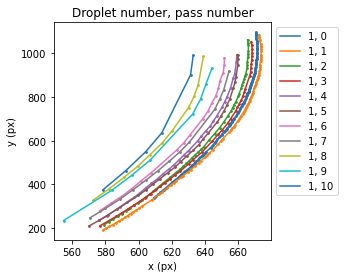

In [34]:
# summarize droplet data at each step, for a single droplet label
dropNum = 1
vi0.summarizeDroplet(dropNum, diag=1)

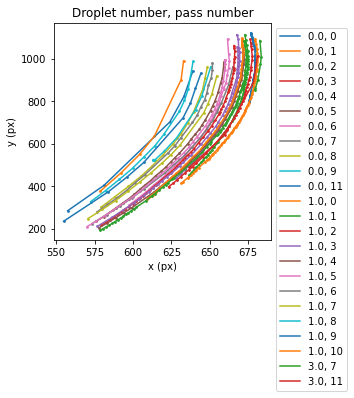

In [36]:
# summarize trajectory of all droplets
vi0.summarizeDroplets(diag=1)

# summaries

In [52]:
# combine all summaries from a folder into one table
sumall, units = fh.combineSummaries(os.path.join(cfg.path.export, 'steady', 'M4S_2.75T'))
sumall

,dropNum,N,gdotrad,gdotHz,etad,etam,lam,k,w,l,...,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk,vid
0.0,087.0,160.0,6.283185,1.0,0.829441,4.478751,0.185195,0.870977,0.000214,0.000216,...,0.000107,0.000489,0.003485,0.000109,0.000756,1.039486,1.336494e+05,4.566320,-1.000000,087
1.0,087.0,83.0,12.566371,2.0,0.550961,2.481156,0.222058,0.898782,0.000214,0.000217,...,0.000107,0.000545,0.005398,0.000220,0.002104,4.212616,1.124982e+05,5.092488,-1.000000,087
2.0,087.0,54.0,18.849556,3.0,0.437422,1.756678,0.249005,0.918131,0.000214,0.000218,...,0.000107,0.000603,0.007436,0.000343,0.004081,10.272719,8.885372e+04,5.630343,-1.000000,087
3.0,087.0,44.0,25.132741,4.0,0.372570,1.375077,0.270945,0.933312,0.000214,0.000218,...,0.000107,0.000611,0.008746,0.000445,0.006116,17.245009,-8.135841e+04,5.710298,295.248567,087
4.0,087.0,24.0,31.415927,5.0,0.329512,1.137216,0.289753,0.945939,0.000214,0.000218,...,0.000107,0.000680,0.011083,0.000598,0.009352,31.214698,-2.195276e+05,6.353637,481.740449,087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.0,586.2,12.0,50.265482,8.0,0.255474,0.762359,0.335110,0.975002,0.000342,0.000369,...,0.000174,0.000815,0.037497,0.001069,0.046974,37.772212,-5.381607e+05,4.685388,742.939261,586
16.0,586.2,13.0,62.831853,10.0,0.226796,0.630555,0.359677,0.989975,0.000339,0.000379,...,0.000174,0.000870,0.055850,0.001379,0.084388,62.932489,-8.240757e+05,5.002194,912.370819,586
17.0,586.2,8.0,75.398224,12.0,0.205924,0.539981,0.381353,1.002767,0.000338,0.000378,...,0.000174,0.000917,0.056463,0.001699,0.099419,95.466427,-9.423258e+05,5.275989,969.394400,586
18.0,586.9,7.0,62.831853,10.0,0.226796,0.630555,0.359677,0.989975,0.000318,0.000343,...,0.000166,0.000738,0.038223,0.001171,0.057754,49.502466,-1.616087e+06,4.436460,1277.674596,586


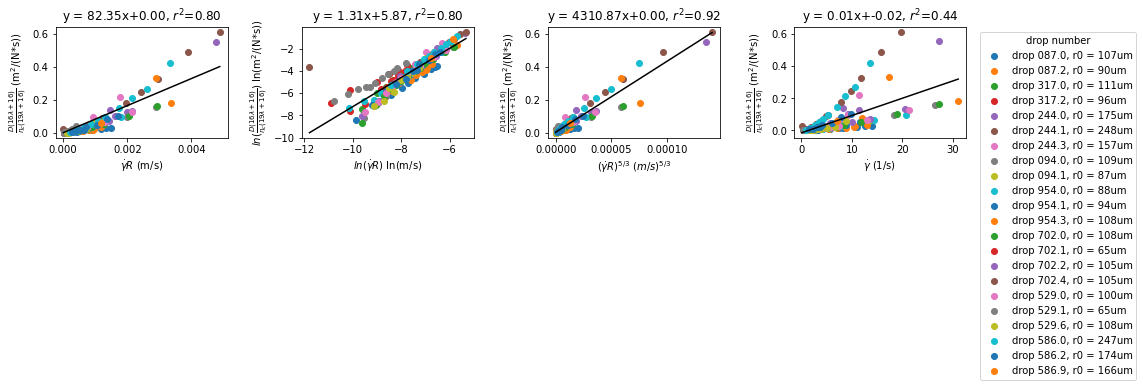

In [105]:
# fit all the summaries together and plot fits
ssmall = sumall[(sumall.r0<0.0005/2)]
fig, axs = plt.subplots(1,4, figsize=(16,4))
tlist = [0,1,2,3]
for i in tlist:
    if i==0:
        x1 = ssmall.gr
        y1 = ssmall.Dte
        axs[i].set_xlabel(r'$\dot{\gamma}R$ (m/s)')
        axs[i].set_ylabel(r'$\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)}$ (m$^2$/(N*s))')
    elif i==1:
        x1 = [np.log(j) for j in ssmall.gr]
        y1 = [np.log(j) for j in ssmall.Dte]
        axs[i].set_xlabel(r'$ln(\dot{\gamma}R)$ ln(m/s)')
        axs[i].set_ylabel(r'$ln(\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)})$ ln(m$^2$/(N*s))')
    elif i==2:
        x1 = ssmall.gr**(5/3)
        y1 = ssmall.Dte
        axs[i].set_xlabel(r'$(\dot{\gamma}R)^{5/3}$ $(m/s)^{5/3}$')
        axs[i].set_ylabel(r'$\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)}$ (m$^2$/(N*s))')
    elif i==3:
        x1 = ssmall.gdotHzest
        y1 = ssmall.Dte
        axs[i].set_xlabel(r'$\dot{\gamma}$ (1/s)')
        axs[i].set_ylabel(r'$\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)}$ (m$^2$/(N*s))')
    x1 = list(x1)
    y1 = list(y1)
    if i==0:
        lr = vd.linearReg(x1, y1, intercept=0)
    else:
        lr = vd.linearReg(x1, y1)
    title = "y = {:.2f}x+{:.2f}, $r^2$={:.2f}".format(lr['b'],lr['c'],lr['rsq'])
    axs[i].set_title(title) 
    x = [min(x1), max(x1)]
    y = [lr['b']*i+lr['c'] for i in x]
    for dn in ssmall.dropNum.unique():
        x2 = [x1[j] for j in range(len(x1)) if ssmall.iloc[j]['dropNum']==dn]
        y2 = [y1[j] for j in range(len(y1)) if ssmall.iloc[j]['dropNum']==dn]
        r0 = ssmall[ssmall.dropNum==dn].iloc[0]['r0']
        axs[i].scatter(x2, y2, label='drop {}, r0 = {:.0f}um'.format(dn, r0*10**6))
    axs[i].plot(x,y, color='black')
axs[tlist[-1]].legend(bbox_to_anchor=(1.05, 1),loc='upper left', title='drop number')
fig.tight_layout()

In [422]:
# get scaling of Taylor parameter with shear rate
ssmall = sumall[(sumall.r0<0.0005/2)]
# ssmall = ssmall[(ssmall.r0<0.000247)]
# ssmall = ssmall[ssmall.dropNum==3]
out = []
for dn in ssmall.dropNum.unique():
    ssmall2 = ssmall[ssmall.dropNum==dn]
    x1 = [np.log(j) for j in ssmall2.gr]
    y1 = [np.log(j) for j in ssmall2.Dte]
    lr = vd.linearReg(x1, y1)
    if len(lr)>0:
        out.append({'dropNum':dn, 'r0':ssmall2.iloc[0]['r0']*10**6, 'n':lr['b'], 'rsq':lr['rsq']})
powers = pd.DataFrame(out)
powers

,dropNum,r0,n,rsq
0,087.0,107.041492,1.409704,0.989506
1,087.2,90.128754,1.331699,0.972380
2,317.0,111.393926,1.645120,0.983579
3,317.2,96.241261,1.662940,0.971158
4,244.0,174.835707,1.724735,0.984479
5,244.1,248.196603,1.534424,0.997952
6,094.0,109.036621,1.664035,0.980975
7,954.0,87.630804,1.398827,0.980215
8,954.1,94.051896,1.831509,0.989738
9,702.0,107.818371,1.722828,0.975878


Text(0, 0.5, 'Scaling ($(\\dot{\\gamma}R)^n$)')

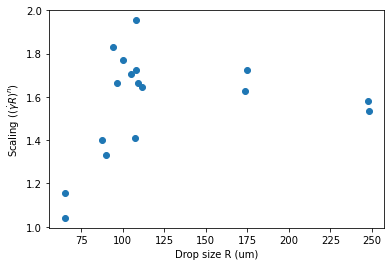

In [423]:
plt.scatter(powers['r0'], powers['n'])
plt.xlabel('Drop size R (um)')
plt.ylabel('Scaling ($(\dot{\gamma}R)^n$)')

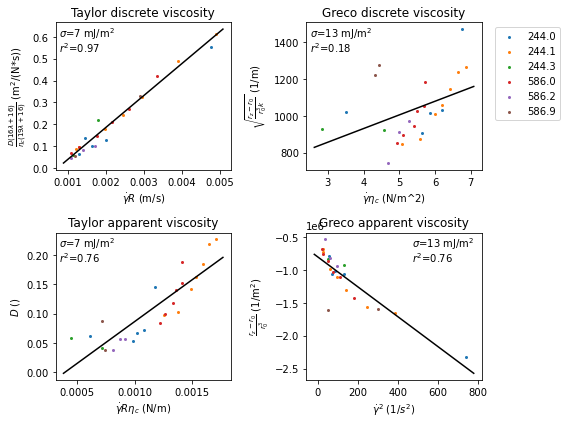

In [106]:
# Fit surface tension for selected points
ssmall = sumall[(sumall.r0<0.0005/2)]       # droplet must be smaller than half the gap
ssmall = sumall[(sumall.r0>0.000150)]       # droplet must be large enough to deform
ssmall = ssmall[(ssmall.gr>0.001)]          # shear rate must be high enough to deform
sp = vr.summaryPlot()
for dn in ssmall.dropNum.unique():
    sp.plotSummary(ssmall[ssmall.dropNum==dn], label=dn)
for i in [1,2,3,4]:
    fit = vd.sigmaFit(ssmall, i, intercept='')
    sp.plotFit(fit)
sp.clean()
sp.fig